In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [25]:
import tensorflow as tf

tf.__version__

'1.14.0'

In [26]:

from tensorflow.keras.models import Sequential,Model 
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import LeakyReLU

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model,save_model

### Data

https://github.com/zalandoresearch/fashion-mnist

In [27]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist



In [28]:

(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

* 60000 training samples, each is 28x28
* 10000 test samples, each is 28x28

In [29]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [30]:
X_train[0,:,:]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

#### Images

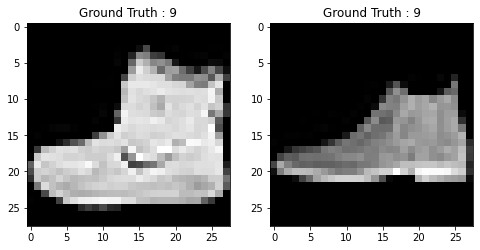

In [31]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=[8,8])

# Display the first image in training data

ax1.imshow(X_train[0,:,:], cmap='gray')
ax1.set_title(f'Ground Truth : {y_train[0]}')

# Display the first image in testing data

ax2.imshow(X_test[0,:,:], cmap='gray')
ax2.set_title(f'Ground Truth : {y_test[0]}');


Training and test images of ankle boots labeled as class 9.

Grayscale images with pixel values 0 to 255

### Data Preprocessing

* Reshape each image to 28x28x1.
* Convert to float32
* Scale to (0,1)

In [32]:
X_train = X_train.reshape(-1, 28,28, 1)
X_test = X_test.reshape(-1, 28,28, 1)
print(X_train.shape, X_test.shape)
X_train[0,16:23,1,0]

(60000, 28, 28, 1) (10000, 28, 28, 1)


array([  0,  57, 202, 233, 204, 203, 122], dtype=uint8)

In [33]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.
X_train[0,16:23,1,0]

array([0.        , 0.22352941, 0.7921569 , 0.9137255 , 0.8       ,
       0.79607844, 0.47843137], dtype=float32)

#### One-hot encode labels

In [34]:
# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print('One hot shape ',y_test_one_hot.shape)
# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

One hot shape  (10000, 10)
Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#### Split training data into training data and validation data

train_X: train model on this data (80% of X_train)  
valid_X: used to validate model on this data (20% of X_train)  
train_label: labels for train_X (80% of y_train_one_hot)  
valid_label: labels for valid_X (20% of y_train_one_hot)  
  
Note: Still have X_test and y_test_one_hot for Prediction

In [35]:
train_X,valid_X,train_label,valid_label = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

### Network Architecture

![](TheNetwork.png)

#### Specify model structure

In [36]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),
                     padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))

model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(10, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

#### Number of parameters Convolutional layer

* nxm dimensions of kernel, 
* l = number in, 
* +1 for bias
* k = number out


In [38]:
# Number of parameters conv2d_2
# n,m = shape of kernel
# l = number of inputs
# k = number of outputs
n,m,l,k = 3,3,32,64
(n*m*l+1)*k

18496

#### Number of parameters in fully connected layer

In [39]:
l,k = 2048,128
(l+1)*k


262272

#### Number of parameters in output layer

In [40]:
l,k = 128,10
(l+1)*k

1290

In [41]:
layer3 = model.get_layer(index=3)
layer3.name

'conv2d_1'

In [42]:
model.layers

### Compile Model

Choose:

- Optimizer:  Adam  
- Loss type: categorical_crossentropy (could use binary cross-entropy)    
- Metric: accuracy

In [43]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

### Train the model

Keras fit function returns a history object to use later to analyze performance

In [44]:
batch_size = 64 #128,256 # Minibatch size
epochs = 10

In [45]:
model_train = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,
                        validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 75s 2ms/sample - loss: 0.4663 - acc: 0.8308 - val_loss: 0.3380 - val_acc: 0.8828
Epoch 2/10
48000/48000 [==============================] - 73s 2ms/sample - loss: 0.2893 - acc: 0.8945 - val_loss: 0.2800 - val_acc: 0.8968
Epoch 3/10
48000/48000 [==============================] - 81s 2ms/sample - loss: 0.2420 - acc: 0.9122 - val_loss: 0.2469 - val_acc: 0.9095
Epoch 4/10
48000/48000 [==============================] - 82s 2ms/sample - loss: 0.2103 - acc: 0.9229 - val_loss: 0.2511 - val_acc: 0.9107
Epoch 5/10
48000/48000 [==============================] - 81s 2ms/sample - loss: 0.1845 - acc: 0.9315 - val_loss: 0.2291 - val_acc: 0.9165
Epoch 6/10
48000/48000 [==============================] - 80s 2ms/sample - loss: 0.1593 - acc: 0.9403 - val_loss: 0.2211 - val_acc: 0.9229
Epoch 7/10
48000/48000 [==============================] - 80s 2ms/sample - loss: 0.1388 - acc: 0.9478 - val_loss: 0.

### Evaluate model on test set

In [46]:
test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2766612820893526
Test accuracy: 0.9154


In [ ]:
model_train.history.keys()

In [ ]:
accuracy = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))

In [ ]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel("Epoch")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel("Epoch")
plt.title('Training and validation loss')
plt.legend();

Notice U-shaped curve in the Loss plot: means the model is overfitting after about epoch 4 or 5

### Dropout

Reduce overfitting by using dropout. Dropout randomly turns off a percentage of the unit during training.

Number of units to drop is a hyperparameter

In [ ]:
batch_size = 64
epochs = 10


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()

In [ ]:
model.compile(loss=categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])

In [ ]:
model_train_dropout = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,
                                verbose=1,validation_data=(valid_X, valid_label))

#### Saving the model

We can do a warm restart with the saved model

In [ ]:
save_model(model,"model_dropout.h5py")

### Evaluate the new model

In [ ]:
test_eval = model.evaluate(X_test, y_test_one_hot, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

In [ ]:
accuracy = model_train_dropout.history['accuracy']
val_accuracy = model_train_dropout.history['val_accuracy']
loss = model_train_dropout.history['loss']
val_loss = model_train_dropout.history['val_loss']
epochs = range(len(accuracy))

In [ ]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.xlabel("Epoch")
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel("Epoch")
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predict the Classes of the test data

In [ ]:
predicted_classes = model.predict(X_test)

print(predicted_classes[0,:])
print(np.round(predicted_classes[0,:],5))
print(predicted_classes.shape)

In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
print(f'Predicted = {predicted_classes[0]}, label = {y_test[0]}')
predicted_classes.shape, y_test.shape

In [ ]:
correct = np.where(predicted_classes==y_test)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

In [ ]:
incorrect = np.where(predicted_classes!=y_test)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

#### Confusion Matrix

In [ ]:
cm = confusion_matrix(predicted_classes,y_test)
print(cm)

print(f'Accuracy: {np.trace(cm)/np.sum(cm)}')

In [ ]:
m = load_model("model_dropout.h5py")
m

In [ ]:
m.summary()

In [ ]:
test_eval2 = m.evaluate(X_test, y_test_one_hot, verbose=0)
print('Test loss:', test_eval2[0])
print('Test accuracy:', test_eval2[1])

In [ ]:
y_test.shape,y_test_one_hot.shape,predicted_classes.shape

### References

https://www.curiousily.com/posts/tensorflow-2-and-keras-quick-start-guide/

https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python